# Railway Sentiment Analysis



In [5]:
import nltk
nltk.download('punkt_tab') #tokenizer

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kishankunal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
import pandas as pd
df  = pd.read_csv("./data/train.csv", encoding = "latin-1", header = None, names = ['index', 'sentiment_label', 'text']) #kept data in same directory under folder name data
df.head()

,index,sentiment_label,text
0,Item ID,Sentiment,SentimentText
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa..."
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...
3,3,0,@RailMinIndia I'm traveling to chennai by trai...
4,4,5,@RailMinIndia irctc is not responding at the t...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            1367 non-null   object
 1   sentiment_label  1367 non-null   object
 2   text             1367 non-null   object
dtypes: object(3)
memory usage: 32.2+ KB


In [16]:
df.drop(0, inplace=True) #removing header as it is redundant

In [19]:
#Displaying schema and null check
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 1 to 1366
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            1366 non-null   object
 1   sentiment_label  1366 non-null   object
 2   text             1366 non-null   object
dtypes: object(3)
memory usage: 32.1+ KB
None
index              0
sentiment_label    0
text               0
dtype: int64


       index sentiment_label  \
count   1366            1366   
unique  1366               8   
top        1               5   
freq       1             299   

                                                     text  
count                                                1366  
unique                                               1353  
top     @rpfwrbct @rpfwr1 @RailMinIndia @Deshbhakth1 @...  
freq                                                    2  


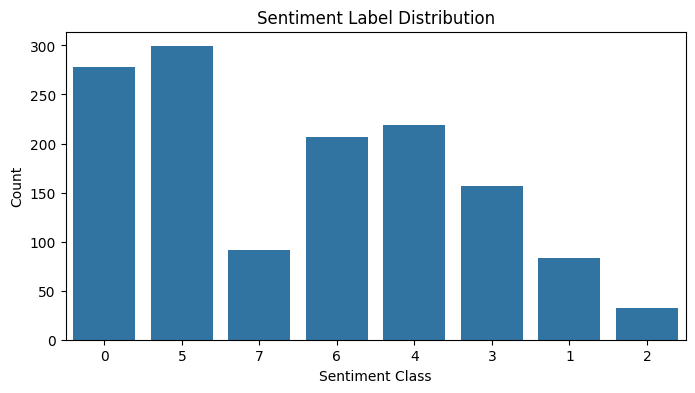

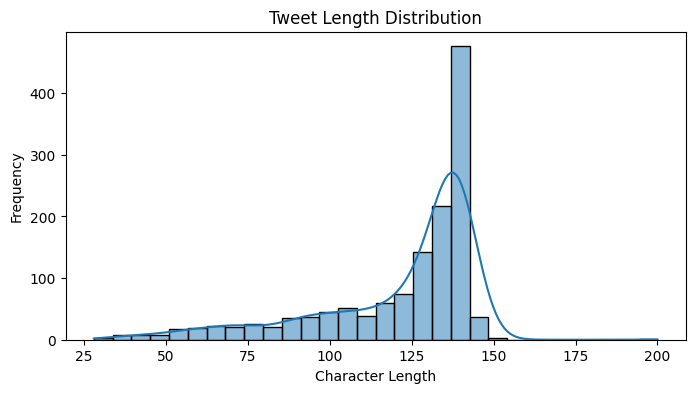

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# describe dataset
print(df.describe())

# Distribution of sentiment labels
plt.figure(figsize=(8,4))
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

# Tweet Length Distribution
df['tweet_length'] = df['text'].apply(len)
plt.figure(figsize=(8,4))
sns.histplot(df['tweet_length'], bins = 30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()

- Sentiment labels range from 0 (Negative) to 7(Positive)
- A few outliers with unusually long lengths (~200+) likely due to urls or concateneated message

# 1.User-Mention Extraction


In [28]:
import re #regular expression library

def extract_mentions(text):
    return re.findall(r'(@\w+)', text) #checking user handle @

df['mentions'] = df['text'].apply(extract_mentions)

In [29]:
df.head()

,index,sentiment_label,text,tweet_length,mentions
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",140,[@RailMinIndia]
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...,137,"[@sureshpprabhu, @RailMinIndia]"
3,3,0,@RailMinIndia I'm traveling to chennai by trai...,122,[@RailMinIndia]
4,4,5,@RailMinIndia irctc is not responding at the t...,68,[@RailMinIndia]
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,104,"[@DRMbhopal, @RailMinIndia, @sanjaygupta2012, ..."


# 2. Hastag extraction


In [35]:
def extract_hastags(text):
    return [tag.lower() for tag in re.findall(r'#(\w+)', text)]

df['hastags'] = df['text'].apply(extract_hastags)
df['hastags'] = df['hastags'].apply(lambda x: list(set(x)))
df.head(20)

,index,sentiment_label,text,tweet_length,mentions,hastags
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",140,[@RailMinIndia],[]
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...,137,"[@sureshpprabhu, @RailMinIndia]",[]
3,3,0,@RailMinIndia I'm traveling to chennai by trai...,122,[@RailMinIndia],[]
4,4,5,@RailMinIndia irctc is not responding at the t...,68,[@RailMinIndia],[]
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,104,"[@DRMbhopal, @RailMinIndia, @sanjaygupta2012, ...",[]
6,6,6,@RailMinIndia If you can't give justice to gra...,127,[@RailMinIndia],[]
7,7,4,@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,139,"[@sureshpprabhu, @RailMinIndiaPlz]",[]
8,8,0,@RailMinIndia @mumbairailusers Dirty water flo...,131,"[@RailMinIndia, @mumbairailusers]",[]
9,9,6,Enter to win $150 Amazon Gift Card! #Books #PN...,94,[],"[romance, books, urbanfantasy, pnr]"
10,10,3,@RailMinIndia still vendors are selling local ...,117,[@RailMinIndia],[]


# 3.Extract urls



In [40]:
def extract_urls(text):
    urls = re.findall(r'https?://\S+', text)
    return urls

df['urls'] = df['text'].apply(extract_urls)
df['clean_text'] = df['text'].apply(lambda x: re.sub(r'https?://\S+', '', x))
df.head(20)

,index,sentiment_label,text,tweet_length,mentions,hastags,urls,clean_text
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",140,[@RailMinIndia],[],[],"@RailMinIndia My PNR is 8348062961, I am in wa..."
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...,137,"[@sureshpprabhu, @RailMinIndia]",[],[],@sureshpprabhu @RailMinIndia AC not working in...
3,3,0,@RailMinIndia I'm traveling to chennai by trai...,122,[@RailMinIndia],[],[],@RailMinIndia I'm traveling to chennai by trai...
4,4,5,@RailMinIndia irctc is not responding at the t...,68,[@RailMinIndia],[],[],@RailMinIndia irctc is not responding at the t...
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,104,"[@DRMbhopal, @RailMinIndia, @sanjaygupta2012, ...",[],[],@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...
6,6,6,@RailMinIndia If you can't give justice to gra...,127,[@RailMinIndia],[],[],@RailMinIndia If you can't give justice to gra...
7,7,4,@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,139,"[@sureshpprabhu, @RailMinIndiaPlz]",[],[],@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...
8,8,0,@RailMinIndia @mumbairailusers Dirty water flo...,131,"[@RailMinIndia, @mumbairailusers]",[],[https://t.co/mBZUOFkLXQ],@RailMinIndia @mumbairailusers Dirty water flo...
9,9,6,Enter to win $150 Amazon Gift Card! #Books #PN...,94,[],"[romance, books, urbanfantasy, pnr]",[https://t.co/jBfXzDe7P2],Enter to win $150 Amazon Gift Card! #Books #PN...
10,10,3,@RailMinIndia still vendors are selling local ...,117,[@RailMinIndia],[],[https://t.co/wdFyLlmMek],@RailMinIndia still vendors are selling local ...


# 4. extracting emojis


In [43]:
import emoji

def replace_emoji(text):
    return emoji.demojize(text, delimiters=(" :", ": "))

df['clean_text'] = df['clean_text'].apply(replace_emoji)
df['clean_text'] = df['clean_text'].str.replace(r':[a-zA-Z0-9_]+:', '', regex=True)

df.head()

,index,sentiment_label,text,tweet_length,mentions,hastags,urls,clean_text
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",140,[@RailMinIndia],[],[],"@RailMinIndia My PNR is 8348062961, I am in wa..."
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...,137,"[@sureshpprabhu, @RailMinIndia]",[],[],@sureshpprabhu @RailMinIndia AC not working in...
3,3,0,@RailMinIndia I'm traveling to chennai by trai...,122,[@RailMinIndia],[],[],@RailMinIndia I'm traveling to chennai by trai...
4,4,5,@RailMinIndia irctc is not responding at the t...,68,[@RailMinIndia],[],[],@RailMinIndia irctc is not responding at the t...
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,104,"[@DRMbhopal, @RailMinIndia, @sanjaygupta2012, ...",[],[],@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...


# 5. Text Pre-processing with NLTK & spaCy


In [48]:
from nltk.tokenize import word_tokenize
import spacy

nlp = spacy.load('en_core_web_sm')

#sample 100 random tweets

sample_tweets = df.sample(n=100)['clean_text']

nltk_tokens = sample_tweets.apply(word_tokenize)

spacy_tokens = sample_tweets.apply(lambda x: [token.text for token in nlp(x)])

#example comparison
for i in range(5):
    print(f"\nTweet {i+1} :")
    print("NLTK : ", nltk_tokens.iloc[i])
    print("SpaCy : ", spacy_tokens.iloc[i])



Tweet 1 :
NLTK :  ['@', 'RailMinIndia', 'Railway', 'was', 'never', 'been', 'so', 'irresponsible', '.', 'so', 'called', 'fake', 'development', 'is', 'happening', '.', 'railway', 'was', 'never', 'been', 'so', 'irresponsible', '.', '?', '?', '?', '?']
SpaCy :  ['@RailMinIndia', 'Railway', 'was', 'never', 'been', 'so', 'irresponsible', '.', 'so', 'called', 'fake', 'development', 'is', 'happening', '.', 'railway', 'was', 'never', 'been', 'so', 'irresponsible', '.', '?', '?', '?', '?']

Tweet 2 :
NLTK :  ['@', 'leomanojc', '@', 'SirDebasis', '@', 'Naren_Reddy23', '@', 'SayNoToHindi', '@', 'mnsadhikrut', '@', 'abpmajhatv', '@', 'anilshidore', '@', 'RailMinIndiaâ\x80¦']
SpaCy :  ['@leomanojc', '@SirDebasis', '@Naren_Reddy23', '@SayNoToHindi', '@mnsadhikrut', '@abpmajhatv', '@anilshidore', '@RailMinIndiaâ\x80', '¦']

Tweet 3 :
NLTK :  ['RT', '@', 'RailMinIndia', ':', 'Member', 'Traffic', 'reviewed', 'the', 'April-', 'Nov', 'transportation', 'performance', 'with', 'Rly', 'Board', 'and', 'Zonal'

In [52]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['stemmed_text'] = df['clean_text'].apply(lambda x : ' '.join([stemmer.stem(w) for w in x.split()]))

In [58]:
def lemmatize(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

df['lemmatized_text'] = df['clean_text'].apply(lemmatize)

In [59]:
def get_pos_tags(text):
    doc = nlp(text)
    return [(token.text, token.pos_, token.tag_) for token in doc]

df['pos_tags'] = df['clean_text'].apply(get_pos_tags)

df.head(20)

,index,sentiment_label,text,tweet_length,mentions,hastags,urls,clean_text,stemmed_text,lemmatized_text,pos_tags
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",140,[@RailMinIndia],[],[],"@RailMinIndia My PNR is 8348062961, I am in wa...","@railminindia my pnr is 8348062961, i am in wa...","@RailMinIndia my PNR be 8348062961 , I be in w...","[(@RailMinIndia, NOUN, NNS), (My, PRON, PRP$),..."
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...,137,"[@sureshpprabhu, @RailMinIndia]",[],[],@sureshpprabhu @RailMinIndia AC not working in...,@sureshpprabhu @railminindia ac not work in pr...,@sureshpprabhu @railminindia AC not work in pr...,"[(@sureshpprabhu, NOUN, NN), (@RailMinIndia, N..."
3,3,0,@RailMinIndia I'm traveling to chennai by trai...,122,[@RailMinIndia],[],[],@RailMinIndia I'm traveling to chennai by trai...,@railminindia i'm travel to chennai by train 1...,@railminindia I be travel to chennai by train ...,"[(@RailMinIndia, NOUN, NN), (I, PRON, PRP), ('..."
4,4,5,@RailMinIndia irctc is not responding at the t...,68,[@RailMinIndia],[],[],@RailMinIndia irctc is not responding at the t...,@railminindia irctc is not respond at the time...,@RailMinIndia irctc be not respond at the time...,"[(@RailMinIndia, PROPN, NNP), (irctc, NOUN, NN..."
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,104,"[@DRMbhopal, @RailMinIndia, @sanjaygupta2012, ...",[],[],@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,@drmbhopal @railminindia @sanjaygupta2012 @drm...,@DRMbhopal @railminindia @sanjaygupta2012 @drm...,"[(@DRMbhopal, PROPN, NNP), (@RailMinIndia, NOU..."
6,6,6,@RailMinIndia If you can't give justice to gra...,127,[@RailMinIndia],[],[],@RailMinIndia If you can't give justice to gra...,@railminindia if you can't give justic to grad...,@RailMinIndia if you can not give justice to g...,"[(@RailMinIndia, NOUN, NNS), (If, SCONJ, IN), ..."
7,7,4,@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,139,"[@sureshpprabhu, @RailMinIndiaPlz]",[],[],@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,@sureshpprabhu @railminindiaplz wrkout smthng ...,@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,"[(@sureshpprabhu, PROPN, NNP), (@RailMinIndiaP..."
8,8,0,@RailMinIndia @mumbairailusers Dirty water flo...,131,"[@RailMinIndia, @mumbairailusers]",[],[https://t.co/mBZUOFkLXQ],@RailMinIndia @mumbairailusers Dirty water flo...,@railminindia @mumbairailus dirti water flow f...,@RailMinIndia @mumbairailusers Dirty water flo...,"[(@RailMinIndia, PROPN, NNP), (@mumbairailuser..."
9,9,6,Enter to win $150 Amazon Gift Card! #Books #PN...,94,[],"[romance, books, urbanfantasy, pnr]",[https://t.co/jBfXzDe7P2],Enter to win $150 Amazon Gift Card! #Books #PN...,enter to win $150 amazon gift card! #book #pnr...,enter to win $ 150 Amazon Gift Card ! # Books ...,"[(Enter, VERB, VB), (to, PART, TO), (win, VERB..."
10,10,3,@RailMinIndia still vendors are selling local ...,117,[@RailMinIndia],[],[https://t.co/wdFyLlmMek],@RailMinIndia still vendors are selling local ...,@railminindia still vendor are sell local loca...,@RailMinIndia still vendor be sell local local...,"[(@RailMinIndia, PROPN, NNP), (still, ADV, RB)..."


In [60]:
df.iloc[0]

index                                                              1
sentiment_label                                                    0
text               @RailMinIndia My PNR is 8348062961, I am in wa...
tweet_length                                                     140
mentions                                             [@RailMinIndia]
hastags                                                           []
urls                                                              []
clean_text         @RailMinIndia My PNR is 8348062961, I am in wa...
stemmed_text       @railminindia my pnr is 8348062961, i am in wa...
lemmatized_text    @RailMinIndia my PNR be 8348062961 , I be in w...
pos_tags           [(@RailMinIndia, NOUN, NNS), (My, PRON, PRP$),...
Name: 1, dtype: object

In [62]:
import time

start_time = time.time()

for _ in range(100):
    lemmatize(df.iloc[0]['clean_text'])
end_time = time.time()

avg_time_per_tweet = (end_time - start_time) / 100
print(f"Average processing time :  {avg_time_per_tweet : .4f} seconds")

Average processing time :   0.0067 seconds


# 6 NamedEntity Recognition


In [64]:
def extract_entites(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entites'] = df['clean_text'].apply(extract_entites)
df.head()

,index,sentiment_label,text,tweet_length,mentions,hastags,urls,clean_text,stemmed_text,lemmatized_text,pos_tags,entites
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",140,[@RailMinIndia],[],[],"@RailMinIndia My PNR is 8348062961, I am in wa...","@railminindia my pnr is 8348062961, i am in wa...","@RailMinIndia my PNR be 8348062961 , I be in w...","[(@RailMinIndia, NOUN, NNS), (My, PRON, PRP$),...","[(PNR, ORG), (8348062961, DATE)]"
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...,137,"[@sureshpprabhu, @RailMinIndia]",[],[],@sureshpprabhu @RailMinIndia AC not working in...,@sureshpprabhu @railminindia ac not work in pr...,@sureshpprabhu @railminindia AC not work in pr...,"[(@sureshpprabhu, NOUN, NN), (@RailMinIndia, N...","[(@sureshpprabhu @RailMinIndia AC, ORG), (toda..."
3,3,0,@RailMinIndia I'm traveling to chennai by trai...,122,[@RailMinIndia],[],[],@RailMinIndia I'm traveling to chennai by trai...,@railminindia i'm travel to chennai by train 1...,@railminindia I be travel to chennai by train ...,"[(@RailMinIndia, NOUN, NN), (I, PRON, PRP), ('...","[(16102, CARDINAL), (S4-46, DATE), (one, CARDI..."
4,4,5,@RailMinIndia irctc is not responding at the t...,68,[@RailMinIndia],[],[],@RailMinIndia irctc is not responding at the t...,@railminindia irctc is not respond at the time...,@RailMinIndia irctc be not respond at the time...,"[(@RailMinIndia, PROPN, NNP), (irctc, NOUN, NN...",[]
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,104,"[@DRMbhopal, @RailMinIndia, @sanjaygupta2012, ...",[],[],@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,@drmbhopal @railminindia @sanjaygupta2012 @drm...,@DRMbhopal @railminindia @sanjaygupta2012 @drm...,"[(@DRMbhopal, PROPN, NNP), (@RailMinIndia, NOU...",[]


In [77]:
def map_domain_entites(entites):
    mapped = []
    for text, label in entites:
        if label == 'GPE':
            mapped.append((text, 'STATION'))
        elif label == 'CARDINAL' and len(text) > 2:
            mapped.append((text, 'TRAIN_NO'))
        elif label == 'ORDINAL':
            mapped.append((text, 'COACH'))
        elif text.lower in ['water', 'ac', 'cleanliness', 'toilet']:
            mapped.append((text, 'SERVICE'))
        else:
            mapped.append((text, 'OTHER'))

df['domain_entites'] = df['entites'].apply(map_domain_entites)

df.head(20)

,index,sentiment_label,text,tweet_length,mentions,hastags,urls,clean_text,stemmed_text,lemmatized_text,pos_tags,entites,domain_entites
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",140,[@RailMinIndia],[],[],"@RailMinIndia My PNR is 8348062961, I am in wa...","@railminindia my pnr is 8348062961, i am in wa...","@RailMinIndia my PNR be 8348062961 , I be in w...","[(@RailMinIndia, NOUN, NNS), (My, PRON, PRP$),...","[(PNR, ORG), (8348062961, DATE)]",None
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...,137,"[@sureshpprabhu, @RailMinIndia]",[],[],@sureshpprabhu @RailMinIndia AC not working in...,@sureshpprabhu @railminindia ac not work in pr...,@sureshpprabhu @railminindia AC not work in pr...,"[(@sureshpprabhu, NOUN, NN), (@RailMinIndia, N...","[(@sureshpprabhu @RailMinIndia AC, ORG), (toda...",None
3,3,0,@RailMinIndia I'm traveling to chennai by trai...,122,[@RailMinIndia],[],[],@RailMinIndia I'm traveling to chennai by trai...,@railminindia i'm travel to chennai by train 1...,@railminindia I be travel to chennai by train ...,"[(@RailMinIndia, NOUN, NN), (I, PRON, PRP), ('...","[(16102, CARDINAL), (S4-46, DATE), (one, CARDI...",None
4,4,5,@RailMinIndia irctc is not responding at the t...,68,[@RailMinIndia],[],[],@RailMinIndia irctc is not responding at the t...,@railminindia irctc is not respond at the time...,@RailMinIndia irctc be not respond at the time...,"[(@RailMinIndia, PROPN, NNP), (irctc, NOUN, NN...",[],None
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,104,"[@DRMbhopal, @RailMinIndia, @sanjaygupta2012, ...",[],[],@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,@drmbhopal @railminindia @sanjaygupta2012 @drm...,@DRMbhopal @railminindia @sanjaygupta2012 @drm...,"[(@DRMbhopal, PROPN, NNP), (@RailMinIndia, NOU...",[],None
6,6,6,@RailMinIndia If you can't give justice to gra...,127,[@RailMinIndia],[],[],@RailMinIndia If you can't give justice to gra...,@railminindia if you can't give justic to grad...,@RailMinIndia if you can not give justice to g...,"[(@RailMinIndia, NOUN, NNS), (If, SCONJ, IN), ...","[(one, CARDINAL), (SSE, ORG)]",None
7,7,4,@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,139,"[@sureshpprabhu, @RailMinIndiaPlz]",[],[],@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,@sureshpprabhu @railminindiaplz wrkout smthng ...,@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,"[(@sureshpprabhu, PROPN, NNP), (@RailMinIndiaP...","[(@sureshpprabhu @RailMinIndiaPlz wrkout, ORG)...",None
8,8,0,@RailMinIndia @mumbairailusers Dirty water flo...,131,"[@RailMinIndia, @mumbairailusers]",[],[https://t.co/mBZUOFkLXQ],@RailMinIndia @mumbairailusers Dirty water flo...,@railminindia @mumbairailus dirti water flow f...,@RailMinIndia @mumbairailusers Dirty water flo...,"[(@RailMinIndia, PROPN, NNP), (@mumbairailuser...","[(8.08, CARDINAL)]",None
9,9,6,Enter to win $150 Amazon Gift Card! #Books #PN...,94,[],"[romance, books, urbanfantasy, pnr]",[https://t.co/jBfXzDe7P2],Enter to win $150 Amazon Gift Card! #Books #PN...,enter to win $150 amazon gift card! #book #pnr...,enter to win $ 150 Amazon Gift Card ! # Books ...,"[(Enter, VERB, VB), (to, PART, TO), (win, VERB...","[(150, MONEY), (Amazon, ORG), (Gift Card, PERS...",None
10,10,3,@RailMinIndia still vendors are selling local ...,117,[@RailMinIndia],[],[https://t.co/wdFyLlmMek],@RailMinIndia still vendors are selling local ...,@railminindia still vendor are sell local loca...,@RailMinIndia still vendor be sell local local...,"[(@RailMinIndia, PROPN, NNP), (still, ADV, RB)...",[],None


In [84]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer, negated
from afinn import Afinn
from nrclex import NRCLex

#initialing sentiment tools
vader_analyzer = SentimentIntensityAnalyzer()
afinn = Afinn()

def clean_text(text):
    return text.replace("RT", "").replace(r"@\S+", "").replace(r"#\S+","").strip()

df['clean_text2'] = df['text'].apply(clean_text)

#compute sentiment scores

df['vader_score'] = df['clean_text2'].apply(lambda x : vader_analyzer.polarity_scores(x)['compound'])
df['affin_score'] = df['clean_text2'].apply(lambda x : afinn.score(x))

def get_nrc_score(text):
    try:
        emotion = NRCLex(text = text)
        return sum(emotion.affect_frequencies.values())
    except Exception as e:
        return 0

df['nrc_score'] = df['clean_text'].apply(get_nrc_score)

threshold  = 0.05

df['vader_polarity'] = df['vader_score'].apply(lambda x : 'positive' if x >= threshold else 'negative')
df['affin_polarity'] = df['affin_score'].apply(lambda x : 'positive' if x > 0 else 'negative')
df['nrc_polarity'] = df['nrc_score'].apply(lambda x : 'positive' if x > 0 else 'negative')


#compute alignment
df['alignment'] = df.apply(
    lambda row : 1 if row['vader_polarity'] == row['affin_polarity'] == row['nrc_polarity']  else 0,
    axis=1
)


#show some aligned vs non-aligned rows
aligned_df = df[df['alignment'] == 1]
non_aligned_df = df[df['alignment'] == 0]


# print result
total = len(df)
aligned = len(aligned_df)
agreement_rate = aligned / total*100

print(f"\nTotal Tweets : {total}")
print(f"Aligned Tweets : {aligned}")
print(f"Agreement rate : {agreement_rate : .2f}%")





Total Tweets : 1366
Aligned Tweets : 432
Agreement rate :  31.63%


In [85]:
df.head()

,index,sentiment_label,text,tweet_length,mentions,hastags,urls,clean_text,stemmed_text,lemmatized_text,...,entites,domain_entites,clean_text2,vader_score,affin_score,nrc_score,vader_polarity,affin_polarity,nrc_polarity,alignment
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",140,[@RailMinIndia],[],[],"@RailMinIndia My PNR is 8348062961, I am in wa...","@railminindia my pnr is 8348062961, i am in wa...","@RailMinIndia my PNR be 8348062961 , I be in w...",...,"[(PNR, ORG), (8348062961, DATE)]",None,"@RailMinIndia My PNR is 8348062961, I am in wa...",-0.4767,-2.0,1.0,negative,negative,positive,0
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...,137,"[@sureshpprabhu, @RailMinIndia]",[],[],@sureshpprabhu @RailMinIndia AC not working in...,@sureshpprabhu @railminindia ac not work in pr...,@sureshpprabhu @railminindia AC not work in pr...,...,"[(@sureshpprabhu @RailMinIndia AC, ORG), (toda...",None,@sureshpprabhu @RailMinIndia AC not working in...,-0.2235,-1.0,1.0,negative,negative,positive,0
3,3,0,@RailMinIndia I'm traveling to chennai by trai...,122,[@RailMinIndia],[],[],@RailMinIndia I'm traveling to chennai by trai...,@railminindia i'm travel to chennai by train 1...,@railminindia I be travel to chennai by train ...,...,"[(16102, CARDINAL), (S4-46, DATE), (one, CARDI...",None,@RailMinIndia I'm traveling to chennai by trai...,0.0000,-2.0,1.0,negative,negative,positive,0
4,4,5,@RailMinIndia irctc is not responding at the t...,68,[@RailMinIndia],[],[],@RailMinIndia irctc is not responding at the t...,@railminindia irctc is not respond at the time...,@RailMinIndia irctc be not respond at the time...,...,[],None,@RailMinIndia irctc is not responding at the t...,0.0000,0.0,1.0,negative,negative,positive,0
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,104,"[@DRMbhopal, @RailMinIndia, @sanjaygupta2012, ...",[],[],@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,@drmbhopal @railminindia @sanjaygupta2012 @drm...,@DRMbhopal @railminindia @sanjaygupta2012 @drm...,...,[],None,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,0.0258,-1.0,1.0,negative,negative,positive,0


In [96]:
#dependency chunk - liked/disliked clause extractor
import spacy
nlp = spacy.load('en_core_web_sm')

def extract_clause(text, postive=True):
    doc = nlp(text)
    for sent in doc.sents:
        if postive and any(tok.lemma_ in {"good", "great", "thank"} for tok in sent):
            return sent.text.strip()
        if not postive and any(tok.lemma_ in {"bad", "not", "delay", "poor", "dirty"} for tok in sent):
            return sent.text.strip()


In [97]:
#filter 10 random positive and 10 negetive tweets
pos_tweets = df[df['vader_polarity'] == "positive"].sample(10, random_state=42)
neg_tweets = df[df['vader_polarity'] == "negative"].sample(10, random_state=42)

#extract liked/disliked clause

pos_tweets["liked_clause"] = pos_tweets['clean_text'].apply(lambda x : extract_clause(x, True))
neg_tweets['disliked_clause'] = neg_tweets['clean_text'].apply(lambda x : extract_clause(x, False))

In [98]:
df.head(20)

,index,sentiment_label,text,tweet_length,mentions,hastags,urls,clean_text,stemmed_text,lemmatized_text,...,clean_text2,vader_score,affin_score,nrc_score,vader_polarity,affin_polarity,nrc_polarity,alignment,liked_clause,disliked_clause
1,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",140,[@RailMinIndia],[],[],"@RailMinIndia My PNR is 8348062961, I am in wa...","@railminindia my pnr is 8348062961, i am in wa...","@RailMinIndia my PNR be 8348062961 , I be in w...",...,"@RailMinIndia My PNR is 8348062961, I am in wa...",-0.4767,-2.0,1.0,negative,negative,positive,0,NaN,NaN
2,2,0,@sureshpprabhu @RailMinIndia AC not working in...,137,"[@sureshpprabhu, @RailMinIndia]",[],[],@sureshpprabhu @RailMinIndia AC not working in...,@sureshpprabhu @railminindia ac not work in pr...,@sureshpprabhu @railminindia AC not work in pr...,...,@sureshpprabhu @RailMinIndia AC not working in...,-0.2235,-1.0,1.0,negative,negative,positive,0,NaN,NaN
3,3,0,@RailMinIndia I'm traveling to chennai by trai...,122,[@RailMinIndia],[],[],@RailMinIndia I'm traveling to chennai by trai...,@railminindia i'm travel to chennai by train 1...,@railminindia I be travel to chennai by train ...,...,@RailMinIndia I'm traveling to chennai by trai...,0.0000,-2.0,1.0,negative,negative,positive,0,NaN,NaN
4,4,5,@RailMinIndia irctc is not responding at the t...,68,[@RailMinIndia],[],[],@RailMinIndia irctc is not responding at the t...,@railminindia irctc is not respond at the time...,@RailMinIndia irctc be not respond at the time...,...,@RailMinIndia irctc is not responding at the t...,0.0000,0.0,1.0,negative,negative,positive,0,NaN,NaN
5,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,104,"[@DRMbhopal, @RailMinIndia, @sanjaygupta2012, ...",[],[],@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,@drmbhopal @railminindia @sanjaygupta2012 @drm...,@DRMbhopal @railminindia @sanjaygupta2012 @drm...,...,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,0.0258,-1.0,1.0,negative,negative,positive,0,NaN,NaN
6,6,6,@RailMinIndia If you can't give justice to gra...,127,[@RailMinIndia],[],[],@RailMinIndia If you can't give justice to gra...,@railminindia if you can't give justic to grad...,@RailMinIndia if you can not give justice to g...,...,@RailMinIndia If you can't give justice to gra...,-0.6093,1.0,1.0,negative,positive,positive,0,NaN,NaN
7,7,4,@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,139,"[@sureshpprabhu, @RailMinIndiaPlz]",[],[],@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,@sureshpprabhu @railminindiaplz wrkout smthng ...,@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,...,@sureshpprabhu @RailMinIndiaPlz wrkout smthng ...,-0.2263,-1.0,1.0,negative,negative,positive,0,NaN,NaN
8,8,0,@RailMinIndia @mumbairailusers Dirty water flo...,131,"[@RailMinIndia, @mumbairailusers]",[],[https://t.co/mBZUOFkLXQ],@RailMinIndia @mumbairailusers Dirty water flo...,@railminindia @mumbairailus dirti water flow f...,@RailMinIndia @mumbairailusers Dirty water flo...,...,@RailMinIndia @mumbairailusers Dirty water flo...,-0.4404,-2.0,1.0,negative,negative,positive,0,NaN,NaN
9,9,6,Enter to win $150 Amazon Gift Card! #Books #PN...,94,[],"[romance, books, urbanfantasy, pnr]",[https://t.co/jBfXzDe7P2],Enter to win $150 Amazon Gift Card! #Books #PN...,enter to win $150 amazon gift card! #book #pnr...,enter to win $ 150 Amazon Gift Card ! # Books ...,...,Enter to win $150 Amazon Gift Card! #Books #PN...,0.9060,8.0,0.0,positive,positive,negative,0,NaN,NaN
10,10,3,@RailMinIndia still vendors are selling local ...,117,[@RailMinIndia],[],[https://t.co/wdFyLlmMek],@RailMinIndia still vendors are selling local ...,@railminindia still vendor are sell local loca...,@RailMinIndia still vendor be sell local local...,...,@RailMinIndia still vendors are selling local ...,0.3612,2.0,0.0,positive,positive,negative,0,NaN,NaN


# image processing


In [103]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, filters, color, exposure
from pathlib import Path

def preprocess_images_skimage(data_dir, output_dir):
    """
    Preprocesses images in the specified data directory using scikit-image.
    Steps include: grayscale conversion, resizing, and histogram equalization.
    Processed images are saved to the output directory.

    Args:
        data_dir (str): Path to the input directory containing subfolders (e.g., '0', '1', ...)
                        which in turn contain emotion images (e.g., 'Happy.jpg').
        output_dir (str): Path to the directory where processed images will be saved.
    """
    # Create output directory if it does not exist
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    emotions = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']

    # Define target image size for resizing (e.g., 100x100 pixels)
    img_size = (100, 100)

    # Iterate through potential subject folders (numbered 0 to 18)
    for folder_num in range(19): # Assuming subject folders are named 0, 1, ..., 18
        folder_path = os.path.join(data_dir, str(folder_num))

        # Check if the current path is actually a directory
        if not os.path.isdir(folder_path):
            # print(f"Skipping {folder_path} as it is not a directory.") # Optional: uncomment for verbose skipping
            continue

        # Create corresponding output subdirectory for the current subject folder
        output_folder_path = Path(output_dir) / str(folder_num)
        output_folder_path.mkdir(parents=True, exist_ok=True)

        # Process each emotion's image within the current subject folder
        for emotion in emotions:
            img_filename = f"{emotion}.jpg"
            img_path = os.path.join(folder_path, img_filename)

            # Check if the image file exists
            if not os.path.exists(img_path):
                # print(f"Image not found: {img_path}. Skipping.") # Optional: uncomment for verbose skipping
                continue

            try:
                # 1. Load image
                img = io.imread(img_path)

                # 2. Convert to grayscale if it's a color image (handles RGB/RGBA)
                if img.ndim == 3 and img.shape[2] >= 3:
                    img_gray = color.rgb2gray(img)
                else:
                    # If it's already grayscale or single channel, use it as is.
                    # Ensure it's float for subsequent operations if it wasn't already.
                    img_gray = img.astype(float)

                # 3. Resize image to a consistent size (e.g., 100x100)
                # anti_aliasing=True is recommended for downsampling to prevent aliasing artifacts.
                img_resized = transform.resize(img_gray, img_size, anti_aliasing=True)

                # 4. Apply Histogram Equalization for contrast enhancement
                # This operation typically outputs float values in the range [0.0, 1.0].
                img_eq = exposure.equalize_hist(img_resized)

                # Convert the float image (0.0-1.0) to uint8 (0-255) for common image formats like JPEG
                # Multiplying by 255 and casting to uint8 scales the pixel values appropriately.
                img_to_save = (img_eq * 255).astype(np.uint8)

                # 5. Define the full path for the processed image in the output directory
                output_img_path = output_folder_path / img_filename

                # 6. Save the processed image
                io.imsave(output_img_path, img_to_save)
                print(f"Processed and saved: {output_img_path}")

            except Exception as e:
                # Catch any errors during image processing (e.g., corrupted files, unsupported formats)
                print(f"Error processing {img_path}: {e}")



input_data_directory = "data/images"  # Example: "C:/Users/YourUser/MyDataset" or "/home/user/data/images"
output_results_directory = "processed_images"

print(f"Starting image preprocessing from: {os.path.abspath(input_data_directory)}")
print(f"Output will be saved to: {os.path.abspath(output_results_directory)}")

# Call the image preprocessing function
preprocess_images_skimage(input_data_directory, output_results_directory)

print("\nImage preprocessing task completed!")

Starting image preprocessing from: /Users/kishankunal/PycharmProjects/AppliedAI/RailwayTwitterSentimentAnalysis/data/images
Output will be saved to: /Users/kishankunal/PycharmProjects/AppliedAI/RailwayTwitterSentimentAnalysis/processed_images
Processed and saved: processed_images/0/Anger.jpg
Processed and saved: processed_images/0/Contempt.jpg
Processed and saved: processed_images/0/Disgust.jpg
Processed and saved: processed_images/0/Fear.jpg
Processed and saved: processed_images/0/Happy.jpg
Processed and saved: processed_images/0/Sad.jpg
Processed and saved: processed_images/0/Surprised.jpg
Processed and saved: processed_images/0/Neutral.jpg
Processed and saved: processed_images/1/Anger.jpg
Processed and saved: processed_images/1/Contempt.jpg
Processed and saved: processed_images/1/Disgust.jpg
Processed and saved: processed_images/1/Fear.jpg
Processed and saved: processed_images/1/Happy.jpg
Processed and saved: processed_images/1/Sad.jpg
Processed and saved: processed_images/1/Surpris